# Identify the digits (MNIST) - Convolutional Neural Network


Here, we need to identify the digit in given images. We have total 70,000 grayscale images, 
out of which 49,000 are part of train images with the label of digit and rest 21,000 images
are unlabeled (known as test images). Now, We need to identify the digit for test images.
evaluation metric of this challenge is accuracy. 
The final accuracy obtained for the test set is <b>98.98</b> on Analytics Vidhya

<b>Importing Packages</b>

In [287]:

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


<b>Reading files</b>

In [288]:
df_train=pd.read_csv('C:/Users/hp/Desktop/img/train.csv')
df_train

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3
...,...,...
48995,48995.png,2
48996,48996.png,4
48997,48997.png,9
48998,48998.png,3


<b>Reading images and keeping the size of grayscale images as 28*28 pixels <br>
    Also normalizing the pixels by dividing by 255</b>
    

In [289]:
from keras.preprocessing import image



# reading the training images

train_image = [ ]

for i in range(df_train.shape[0]):

    img = image.load_img('Desktop/img/Images/train/'+df_train['filename'][i], target_size=(28,28,1), grayscale=True)

    img = image.img_to_array(img)
    img=img.astype('float32')

    img = img/255.0

    train_image.append(img)
X = np.array(train_image)

C:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [290]:
X_train=X

In [291]:
X_train[0].shape

(28, 28, 1)

<b>Visualising the 1st Training set image</b>

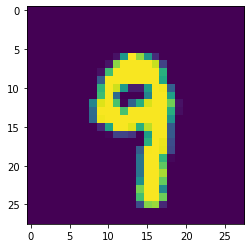

In [292]:


plt.imshow(X_train[1])

In [293]:
df_train['label'].unique()

array([4, 9, 1, 7, 3, 2, 6, 0, 8, 5], dtype=int64)

<b>One-Hot Encoding the Training labels</b>

In [294]:
y=df_train['label']
from keras.utils import np_utils
y=np_utils.to_categorical(y)

In [295]:
y.shape

(49000, 10)

In [296]:
df_test=pd.read_csv('C:/Users/hp/Desktop/img/test.csv')
df_test

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png
...,...
20995,69995.png
20996,69996.png
20997,69997.png
20998,69998.png


In [297]:
from keras.preprocessing import image



# reading the training images

test_image = [ ]

for i in range(df_test.shape[0]):

    img = image.load_img('Desktop/img/Images/test/'+df_test['filename'][i], target_size=(28,28,1), grayscale=True)

    img = image.img_to_array(img)
    img=img.astype('float32')

    img = img/255.0

    test_image.append(img)
X_test= np.array(test_image)

C:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [298]:
X_test.shape

(21000, 28, 28, 1)

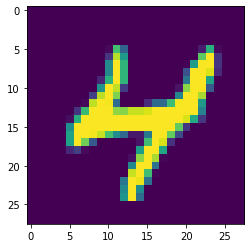

In [299]:
plt.imshow(X_test[0])

<b> Using Data Augmentation Technique</b>

In [300]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(height_shift_range=0.02,rotation_range=7)

# datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,validation_split=0.2)

In [301]:
datagen.fit(X_train)

In [302]:
it = datagen.flow(X_train, y)

In [303]:
X_train.shape

(49000, 28, 28, 1)

<b>Importing necessary Keras Packages</b>

In [304]:
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.models import Sequential
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.optimizers import SGD
%matplotlib inline


<b>Building Convolutional model with 2 layers of Conv2D and Maxpooling layer <br>
    And 2 fully connected layer with 256 and 128 units respectively with Relu activation function <br>
    Finally producing the output using the softmax activation function .</b>

In [306]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

<b>Fitting the model with 10 epochs with size of each epoch as 490.<br>
Training set accuracy came out to be 99.04 after the 10th epoch</b>

In [307]:

model.fit_generator(it, steps_per_epoch=490, epochs=10)

Epoch 1/10
490/490 [==============================] - 15s 31ms/step - loss: 0.2841 - accuracy: 0.9104
Epoch 2/10
490/490 [==============================] - 14s 30ms/step - loss: 0.0942 - accuracy: 0.9705
Epoch 3/10
490/490 [==============================] - 16s 32ms/step - loss: 0.0670 - accuracy: 0.9781
Epoch 4/10
490/490 [==============================] - 15s 31ms/step - loss: 0.0603 - accuracy: 0.9823
Epoch 5/10
490/490 [==============================] - 15s 30ms/step - loss: 0.0567 - accuracy: 0.9813
Epoch 6/10
490/490 [==============================] - 14s 29ms/step - loss: 0.0446 - accuracy: 0.9858
Epoch 7/10
490/490 [==============================] - 15s 31ms/step - loss: 0.0375 - accuracy: 0.9889
Epoch 8/10
490/490 [==============================] - 14s 28ms/step - loss: 0.0392 - accuracy: 0.9879
Epoch 9/10
490/490 [==============================] - 14s 28ms/step - loss: 0.0357 - accuracy: 0.9895
Epoch 10/10
490/490 [==============================] - 14s 28ms/step - loss: 0.031

<b>Predicting the output on the test data</b>

In [308]:
predictions=model.predict_classes(X_test)

In [309]:
predictions.shape

(21000,)

In [310]:
df_test['Labels']=predictions
df_test

,filename,Labels
0,49000.png,4
1,49001.png,0
2,49002.png,9
3,49003.png,7
4,49004.png,9
...,...,...
20995,69995.png,9
20996,69996.png,2
20997,69997.png,6
20998,69998.png,6


In [311]:
df_test.set_index('filename',inplace=True)


In [312]:
df_test.rename(columns={'Labels':'label'},inplace=True)

In [313]:
df_test

,label
filename,
49000.png,4
49001.png,0
49002.png,9
49003.png,7
49004.png,9
...,...
69995.png,9
69996.png,2
69997.png,6


<b>Finally saving the output in the csv format which will be submitted on Analytics Vidhya<br>
This model gave an accuracy 0f 98.98 on the test data</b>

In [315]:
df_test.to_csv('digit_recognizer.csv')